Импортируем все необходимые библиотеки

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
df= pd.read_excel ('online_retail_II.xlsx')

In [3]:
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


Приводим даты к нужному формату и удаляем пропуски

In [4]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [5]:
df.dropna(inplace= True)
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


Посмотрим на описательную статистику получившегося датафрейма с помощью df.describe()

In [6]:
df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,417534.000000,417534,417534.000000,417534.000000
mean,12.758815,2010-07-01 01:12:19.787609856,3.887547,15360.645478
min,-9360.000000,2009-12-01 07:45:00,0.000000,12346.000000
25%,2.000000,2010-03-26 11:26:00,1.250000,13983.000000
50%,4.000000,2010-07-08 19:12:00,1.950000,15311.000000
75%,12.000000,2010-10-14 14:08:00,3.750000,16799.000000
max,19152.000000,2010-12-09 20:01:00,25111.090000,18287.000000
std,101.220424,NaN,71.131797,1680.811316


Можно заметить, что минимальное значение quantity < 0, что странно, ведь это количественная характеристика. Также об этой аномалии не сказано в описании данных, поэтому посмотрим на нее внимательнее с помощью метода query.

In [7]:
df.query('Quantity<0')

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
...,...,...,...,...,...,...,...,...
524695,C538123,22956,36 FOIL HEART CAKE CASES,-2,2010-12-09 15:41:00,2.10,12605.0,Germany
524696,C538124,M,Manual,-4,2010-12-09 15:43:00,0.50,15329.0,United Kingdom
524697,C538124,22699,ROSES REGENCY TEACUP AND SAUCER,-1,2010-12-09 15:43:00,2.95,15329.0,United Kingdom
524698,C538124,22423,REGENCY CAKESTAND 3 TIER,-1,2010-12-09 15:43:00,12.75,15329.0,United Kingdom


Посмотрим на случаи когда Quantity < 0

In [8]:
df_q0= df.query('Quantity<0')
df_q0

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
...,...,...,...,...,...,...,...,...
524695,C538123,22956,36 FOIL HEART CAKE CASES,-2,2010-12-09 15:41:00,2.10,12605.0,Germany
524696,C538124,M,Manual,-4,2010-12-09 15:43:00,0.50,15329.0,United Kingdom
524697,C538124,22699,ROSES REGENCY TEACUP AND SAUCER,-1,2010-12-09 15:43:00,2.95,15329.0,United Kingdom
524698,C538124,22423,REGENCY CAKESTAND 3 TIER,-1,2010-12-09 15:43:00,12.75,15329.0,United Kingdom


In [9]:
df_q0.describe()


,Quantity,InvoiceDate,Price,Customer ID
count,9839.000000,9839,9839.000000,9839.000000
mean,-21.545381,2010-06-15 13:45:38.534404096,28.474384,15035.010367
min,-9360.000000,2009-12-01 10:33:00,0.010000,12346.000000
25%,-6.000000,2010-03-12 13:11:30,1.625000,13576.000000
50%,-2.000000,2010-06-14 13:32:00,2.950000,14911.000000
75%,-1.000000,2010-10-01 13:28:00,6.750000,16454.000000
max,-1.000000,2010-12-09 17:32:00,25111.090000,18287.000000
std,212.077657,NaN,405.041589,1690.634907


Значение count() у текущего датафрейма равно 9839. Теперь посмотрим на значение Invoice у такого датафрейма. Для этого применим методы str и startswith('C'), чтобы посмотреть на значения Invoice, которые начинаются с буквы ‘C’, то есть отменены исходя из описания данных.

In [10]:
df_q0[df_q0['Invoice'].str.startswith('C')]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
...,...,...,...,...,...,...,...,...
524695,C538123,22956,36 FOIL HEART CAKE CASES,-2,2010-12-09 15:41:00,2.10,12605.0,Germany
524696,C538124,M,Manual,-4,2010-12-09 15:43:00,0.50,15329.0,United Kingdom
524697,C538124,22699,ROSES REGENCY TEACUP AND SAUCER,-1,2010-12-09 15:43:00,2.95,15329.0,United Kingdom
524698,C538124,22423,REGENCY CAKESTAND 3 TIER,-1,2010-12-09 15:43:00,12.75,15329.0,United Kingdom


Можно заметить, что количество строк равно предыдущему значению 9839. Можно сделать вывод, что отрицательное значение Quantity говорит о том, что заказ товара отменили, так как эти значения только в тех случаях когда в Invoice перед номером стоит "C" (в описании данных это как раз тогда, когда товар был удален из заказа).

Удалим из датафрейма значения удаления покупок, так как это не интересно для нашего анализа

In [11]:
# Преобразуем значения в 'Invoice' в строки, учитывая возможные NaN, и затем удалим строки
df = df[df['Invoice'].astype(str).str.startswith('C', na=False) == False & (df['Quantity'] >= 1)]

ОСНОВНАЯ ЧАСТЬ АНАЛИЗА

Для начала введем новые столбцы  

In [12]:
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


Введем новые столбцы для дальнейшего анализа.
Столбец total_expenses_per_position будет содержать значение общей стоимости позиции (для этого мы просто умножаем цену на количество).
Столбец total_purchase_for_user будет содержать сумму за всю покупку. Для этого применяются методы groupby() для группировки по дате и id пользователя, и метод transform, который считает сумму благодаря аргументу (‘sum’). 

In [13]:
df['total_expenses_per_position']= df['Price'] * df['Quantity']

C:\Users\User\AppData\Local\Temp\ipykernel_12936\3887532039.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_expenses_per_position']= df['Price'] * df['Quantity']


In [14]:
df['total_purchase_for_user'] = df.groupby(['InvoiceDate', 'Customer ID'])['total_expenses_per_position'].transform('sum')


C:\Users\User\AppData\Local\Temp\ipykernel_12936\2303265738.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_purchase_for_user'] = df.groupby(['InvoiceDate', 'Customer ID'])['total_expenses_per_position'].transform('sum')


Проверка корректности вычисления столбцов

In [15]:
df_check= df.query("InvoiceDate == '2009-12-01 07:45:00' & `Customer ID` == 13085.0")
print (df_check)
print (df_check.total_expenses_per_position.sum())

  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   
5  489434     22064           PINK DOUGHNUT TRINKET POT         24   
6  489434     21871                  SAVE THE PLANET MUG        24   
7  489434     21523   FANCY FONT HOME SWEET HOME DOORMAT        10   

          InvoiceDate  Price  Customer ID         Country  \
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom   
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom   
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom   
3 2009-12-01 07:45:00   2.10      13085.0  United Kingdom   
4 2009-12-01 07:45:00   1.25      13085.0  United Kingdom   
5 2

C:\Users\User\AppData\Local\Temp\ipykernel_12936\1679718501.py:1: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  df_check= df.query("InvoiceDate == '2009-12-01 07:45:00' & `Customer ID` == 13085.0")


Все работает корректно

Проанализируем уникальные покупки пользователей. Для этого создадим новый датафрейм, с несколькими колонками и выведем его описательную статистику. 

In [16]:
# Создадим датафрейм с уникальными покупками 
# Шаг 1: Убираем дубли на уровне уникальных Invoice
unique_purchases = df.drop_duplicates(subset='Invoice')

# Шаг 2: Смотрим статистику по total_purchase_for_user
purchase_stats = unique_purchases['total_purchase_for_user'].describe()

# Вывод результатов
print(purchase_stats)


count    19215.000000
mean       462.203452
std        939.590086
min          0.000000
25%        159.875000
50%        303.980000
75%        486.075000
max      44051.600000
Name: total_purchase_for_user, dtype: float64


Посмотрим на значения total_purchase_for_user

В наборе данных представлено 19215 уникальных записей пользователей. Средняя сумма покупок составляет 462.2 доллара, что отражает типичную покупательскую активность. Однако значительное стандартное отклонение 939 указывает на значительные различия в расходах пользователей, где минимальная сумма достигает 0 долларов, а максимальная — 44051.60 долларов, что, вероятно, связано с крупными покупками или высокой активностью определённых клиентов.
Квантильные значения демонстрируют, что 25% пользователей потратили менее 159 долларов, медиана составляет 303 долларов, а 75% пользователей потратили до 486 долларов. Это показывает, что большинство пользователей укладываются в диапазон до 500 долларов.

Построим гистограмму распределения total_purchase_for_user.

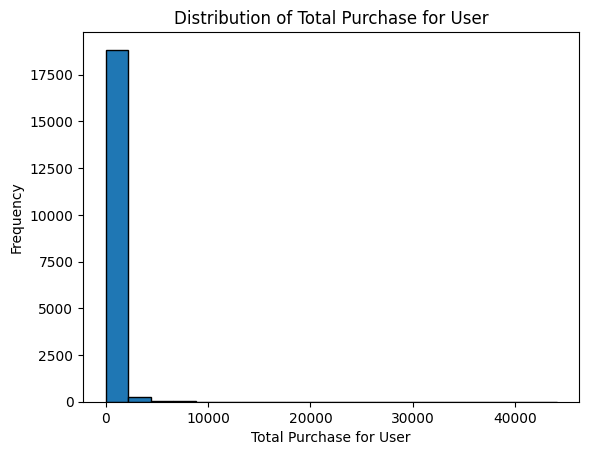

In [17]:
# Строим гистограмму для total_purchase_for_user
plt.hist(unique_purchases['total_purchase_for_user'], bins=20, edgecolor='black')
plt.xlabel('Total Purchase for User')
plt.ylabel('Frequency')
plt.title('Distribution of Total Purchase for User')
plt.show()

Можно посмотреть на более подробную визуализацию, где значения будут до определенной стоимости, чтобы лучше посмотреть на характер распределения. Для этого посчитаем процент покупок определенной стоимости, чтобы выбрать ценовую границу. 

In [18]:
# Фильтруем покупки, где сумма больше 10000
purchases_above_10000 = df[df['total_purchase_for_user'] > 10000]
num_above_10000 = purchases_above_10000.shape[0]
total_purchases = df.shape[0]
percentage_above_10000 = (num_above_10000 / total_purchases) * 100
print(f"Процент покупок с суммой больше 10000: {percentage_above_10000:.2f}%")


# Фильтруем покупки, где сумма больше 1000
purchases_above_1000 = df[df['total_purchase_for_user'] > 1000]
num_above_1000 = purchases_above_1000.shape[0]
percentage_above_1000 = (num_above_1000 / total_purchases) * 100
print(f"Процент покупок с суммой больше 1000: {percentage_above_1000:.2f}%")

# Фильтруем покупки, где сумма больше 6000
purchases_above_6000 = df[df['total_purchase_for_user'] > 6000]
num_above_6000 = purchases_above_6000.shape[0]
percentage_above_6000 = (num_above_6000 / total_purchases) * 100
print(f"Процент покупок с суммой больше 6000: {percentage_above_6000:.2f}%")

# Фильтруем покупки, где сумма больше 5000
purchases_above_5000 = df[df['total_purchase_for_user'] > 5000]
num_above_5000 = purchases_above_5000.shape[0]
percentage_above_5000 = (num_above_5000 / total_purchases) * 100
print(f"Процент покупок с суммой больше 5000: {percentage_above_5000:.2f}%")

Процент покупок с суммой больше 10000: 0.37%
Процент покупок с суммой больше 1000: 13.49%
Процент покупок с суммой больше 6000: 0.66%
Процент покупок с суммой больше 5000: 0.83%


Посмотрим на визуализацию, где значения до 5000, чтобы увидеть распределение подробнее

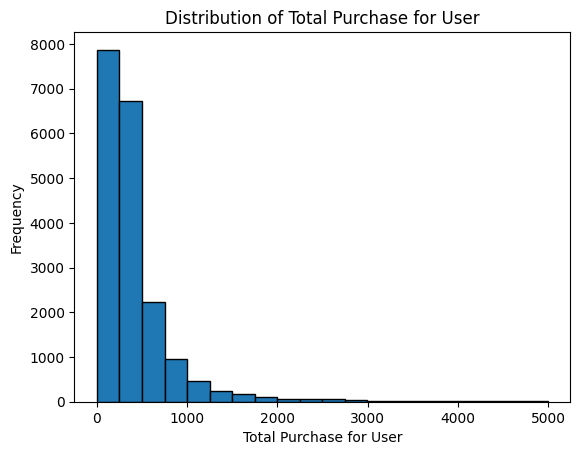

In [19]:
plt.hist(unique_purchases.query('total_purchase_for_user < 5000')['total_purchase_for_user'], bins=20, edgecolor='black')
plt.xlabel('Total Purchase for User')
plt.ylabel('Frequency')
plt.title('Distribution of Total Purchase for User')
plt.show()

Можно увидеть классический график для покупок чего-либо формы гиперболы, когда много пользователей совершают "мелкие" покупки, при этом мало пользователей совершают покупки крупнее.
	Посмотрим, как выглядит самая крупная покупка. Для этого выберем значение 44051, которое было отмечено как самое крупное в описательной статистике. 


In [20]:
# Посморим как выглядела самая крупная покупка
df.query ('total_purchase_for_user== 44051.600000').head(5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,total_expenses_per_position,total_purchase_for_user
47509,493819,21912,VINTAGE SNAKES & LADDERS,216,2010-01-07 12:34:00,3.39,14156.0,EIRE,732.24,44051.6
47510,493819,21749,LARGE RED SPOT WINDMILL,288,2010-01-07 12:34:00,1.85,14156.0,EIRE,532.80,44051.6
47511,493819,21974,SET OF 36 PAISLEY FLOWER DOILIES,288,2010-01-07 12:34:00,1.25,14156.0,EIRE,360.00,44051.6
47512,493819,21877,HOME SWEET HOME MUG,288,2010-01-07 12:34:00,1.06,14156.0,EIRE,305.28,44051.6
47513,493819,21746,SMALL RED SPOT WINDMILL,192,2010-01-07 12:34:00,1.06,14156.0,EIRE,203.52,44051.6


Если смотреть на описание товара, то нельзя однозначно сказать зачем пользователю нужны все эти вещи. Преимущественно это что-то необычно, даже коллекционное (различные часы, сумки, искусственные цветы, дверные коврики и тп). Можно предположить, этот покупатель является другим магазином, который продает такие товары в своем регионе, Ирландии (Country = 'EIRE')

Посмотрим на рапределение количества покупок на каждого пользователя

In [21]:
# Группируем по Customer ID и считаем количество уникальных Invoice для каждого клиента
purchases_per_customer = df.groupby('Customer ID')['Invoice'].nunique()

In [22]:
purchases_per_customer.describe()

count    4314.000000
mean        4.454103
std         8.168658
min         1.000000
25%         1.000000
50%         2.000000
75%         5.000000
max       205.000000
Name: Invoice, dtype: float64

	Общее количество покупателей: count = 4314: В наборе данных 4314 уникальных покупателей (Customer ID), которые совершили покупки.
Среднее количество покупок: mean = 4.45: Среднее количество покупок на пользователя составляет около 4.5 уникальных покупок. Это означает, что типичный покупатель совершает 4-5 покупок.
Обзор основных значений: std = 8.17: Стандартное отклонение довольно высоко, что говорит о большой вариативности в количестве покупок у разных пользователей. Это указывает на то, что есть пользователи, которые делают очень мало покупок, а также те, кто делает значительно больше. min = 1: Минимальное количество покупок для пользователя — 1. Это логично, так как каждый пользователь должен совершить хотя бы одну покупку. max = 205: Максимальное количество покупок для пользователя составляет 205 уникальных покупок. Это очень высокий показатель, который указывает на несколько очень активных пользователей, которые делают покупки регулярно и в большом количестве.
Квантильные значения: 25% = 1: 25% пользователей совершили только одну покупку. Это означает, что значительная часть клиентов делает только одну покупку и не возвращается, что может свидетельствовать о "одноразовых" клиентах. 50% (медиана) = 2: Медианное количество покупок для пользователей составляет 2. Это говорит о том, что половина пользователей совершила всего две покупки, что также подтверждает наличие довольно большого числа клиентов с небольшой активностью. 75% = 5: 75% пользователей совершили 5 или меньше покупок. Это указывает на то, что большинство пользователей находятся в группе с низкой или средней покупательской активностью, и лишь малая часть делает большее количество покупок.
Общие выводы: Множество одноразовых клиентов: Большая часть пользователей делает всего одну или две покупки (около 50% пользователей совершили не более двух покупок), что может означать наличие значительного числа одноразовых клиентов, которые покупают что-то в первый и последний раз. Активные покупатели: Несколько пользователей делают значительно больше покупок (максимум — 205 покупок). Это указывает на наличие постоянных и лояльных клиентов, которые регулярно совершают покупки. Большая вариативность: Показатель стандартного отклонения (8.17) и максимального значения (205) указывает на широкое распределение количества покупок. Важно учитывать, что распределение не является нормальным и есть как клиенты с небольшой покупательской активностью, так и с высокой.


Построим распределение количества покупок на каждого пользователя. Используются уже знакомые методы библиотеки matplotlib, однако в этот раз можно использовать sns.histplot библиотеки seaborn. Возьмем предельным значением 50, чтобы лучше видеть характер распределения.

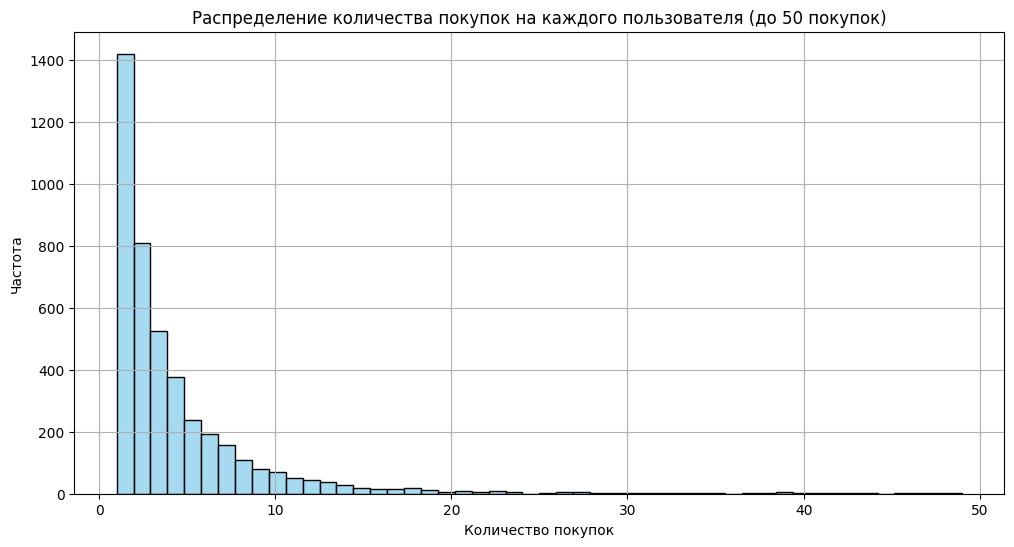

In [23]:
# Фильтруем пользователей, у которых количество покупок <= 50
purchases_per_customer_filtered = purchases_per_customer[purchases_per_customer <= 50]

# Настроим размер графика
plt.figure(figsize=(12, 6))

# Строим гистограмму для отображения распределения покупок (до 50 покупок)
sns.histplot(purchases_per_customer_filtered, bins=50, kde=False, color='skyblue')

# Добавляем заголовок и подписи
plt.title('Распределение количества покупок на каждого пользователя (до 50 покупок)')
plt.xlabel('Количество покупок')
plt.ylabel('Частота')
plt.grid(True)

# Показываем график
plt.show()

	Гистограмма показывает, что большинство пользователей совершают минимальное количество покупок (1-5), и частота резко снижается с увеличением числа покупок. Это свидетельствует о низкой активности большинства клиентов, при этом лишь немногие совершают 10 и более покупок. Такое распределение указывает на значительный потенциал для увеличения числа повторных покупок и вовлечения пользователей.

ПОВЕДЕНИЕ ПОЛЬЗОВАТЕЛЕЙ ПО СТРАНАМ

Посмотрим на количество заказов каждой стране.

In [24]:
# Группировка данных по столбцу 'Country' и подсчет уникальных заказов (Invoice)
order_counts_by_country = df.groupby('Country')['Invoice'].nunique().sort_values(ascending = False)

# Вывод результатов
print(order_counts_by_country)

Country
United Kingdom          17614
Germany                   347
EIRE                      316
France                    236
Netherlands               135
Sweden                     68
Spain                      66
Belgium                    52
Switzerland                40
Australia                  40
Portugal                   40
Channel Islands            30
Austria                    28
Italy                      28
Denmark                    26
Cyprus                     21
Finland                    16
Japan                      16
USA                        15
Greece                     13
Norway                     11
Poland                     10
United Arab Emirates        8
Unspecified                 8
Lithuania                   6
Malta                       4
Singapore                   4
Thailand                    2
Korea                       2
Nigeria                     2
Israel                      2
Iceland                     2
Canada                      2
Ba

Выведем гистограмму деления покупок по странам

C:\Users\User\AppData\Local\Temp\ipykernel_12936\1474561371.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=order_counts_by_country.index, y=order_counts_by_country.values, palette='viridis')


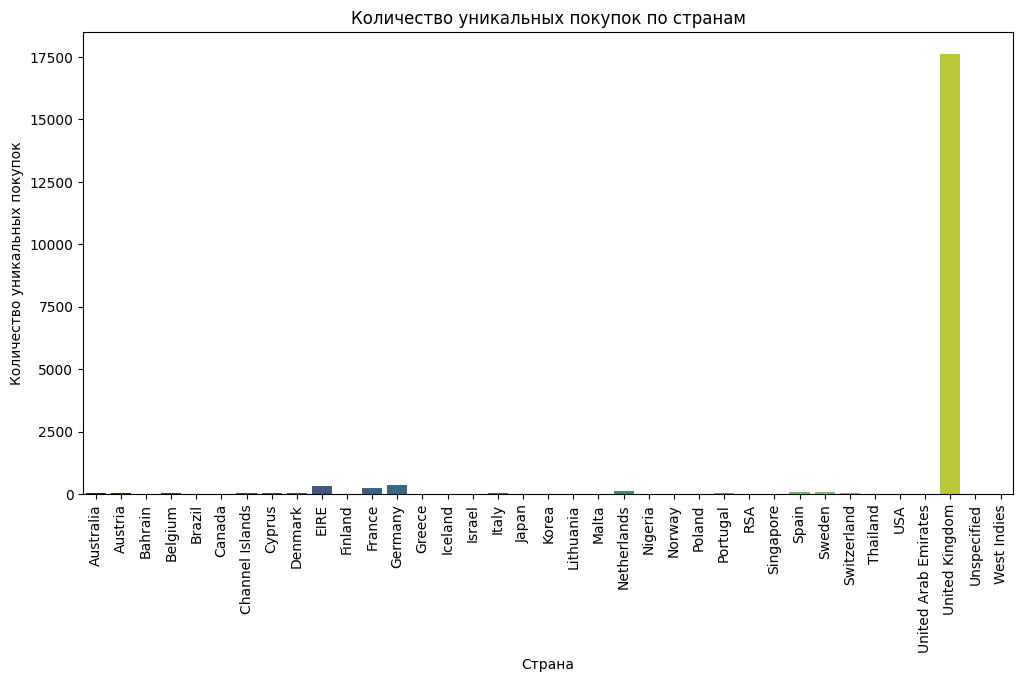

In [25]:
# Группировка данных по столбцу 'Country' и подсчет уникальных заказов (Invoice)
order_counts_by_country = df.groupby('Country')['Invoice'].nunique()

# Создаем график
plt.figure(figsize=(12, 6))
sns.barplot(x=order_counts_by_country.index, y=order_counts_by_country.values, palette='viridis')

# Настроим внешний вид графика
plt.title('Количество уникальных покупок по странам')
plt.xlabel('Страна')
plt.ylabel('Количество уникальных покупок')
plt.xticks(rotation=90)  # Поворот подписей для удобства
plt.show()


	Можно заметить, что большая часть покупок совершается англичанами (что неудедивительно), а также близ лежащими старанами (Ирландия, Германия и Франция). Остальные страны имеют очень маленькую статистику, некоторые даже статистически не значимую, что, к сожалению, может повлиять на дальнейший анализ.

Посчитаем некоторые метрики с разбивкой по странам

In [26]:
# Шаг 1: Оставляем уникальные Invoice для каждой страны
unique_invoices = df.drop_duplicates(subset=['Country', 'Invoice'])

# Шаг 2: Группируем данные по странам и считаем среднее значение total_purchase_for_user
avg_purchase_per_country = unique_invoices.groupby('Country')['total_purchase_for_user'].mean().sort_values(ascending=False)

# Шаг 3: Вывод результата
print(avg_purchase_per_country)




Country
Norway                  2176.743636
Netherlands             1991.007407
Denmark                 1957.955769
Israel                  1599.700000
Thailand                1535.270000
Malta                   1343.375000
EIRE                    1129.541709
Greece                  1102.743846
Switzerland             1098.034750
Singapore               1009.442500
RSA                      931.430000
United Arab Emirates     912.551250
Channel Islands          818.210667
Lithuania                815.446667
Sweden                   805.332794
Australia                786.170000
Unspecified              743.322500
Spain                    721.233636
Iceland                  661.660000
France                   619.556864
Canada                   608.330000
Japan                    607.626250
Portugal                 596.135250
Germany                  587.441991
Korea                    559.255000
Cyprus                   542.369048
Italy                    538.113571
West Indies         

Средняя сумма покупки значительно варьируется в зависимости от страны, что связано с уровнем экономического развития и покупательской способностью населения. Лидерами по этому показателю являются Норвегия (2176), Нидерланды (1991), и Дания (1957). Высокие значения в этих странах объясняются их стабильной экономикой, высоким уровнем дохода населения и, возможно, предпочтением к более дорогим товарам, что делает каждую покупку значительной.
На противоположной стороне находятся страны с низкой средней суммой покупки, такие как США (319), Бразилия (268), и Нигерия (70). Для Нигерии и Бразилии этот показатель может быть обусловлен ограниченной покупательской способностью и менее стабильной экономической ситуацией. Для США низкая средняя сумма покупки может указывать на культуру частых мелких заказов, что снижает средний чек. Эти данные подчеркивают, как экономические и культурные особенности каждой страны влияют на потребительское поведение.


Посчитаем среднее количество уникальных заказов для каждого пользователя в каждой стране.

In [27]:
# 1. Считаем среднее количество уникальных заказов (Invoice) для каждого пользователя в каждой стране
orders_per_user_country = df.groupby(['Country', 'Customer ID'])['Invoice'].nunique()

# 2. Для каждой страны посчитаем среднее количество заказов на одного пользователя
avg_orders_per_user_country = orders_per_user_country.groupby('Country').mean().sort_values(ascending= False)

# 3. Выводим результат
print(avg_orders_per_user_country)


Country
EIRE                    63.200000
Netherlands              6.136364
Lithuania                6.000000
Germany                  5.179104
France                   5.021277
Poland                   5.000000
United Kingdom           4.435659
Sweden                   4.250000
Singapore                4.000000
Malta                    4.000000
Greece                   3.250000
Belgium                  3.058824
Cyprus                   3.000000
Denmark                  2.888889
Switzerland              2.857143
Austria                  2.800000
Channel Islands          2.727273
Australia                2.666667
Japan                    2.666667
Spain                    2.640000
Italy                    2.545455
USA                      2.500000
Finland                  2.285714
Portugal                 2.222222
Norway                   2.200000
Thailand                 2.000000
Iceland                  2.000000
Nigeria                  2.000000
Canada                   2.000000
Unspec

Проверяем аномалию с Ирландией 

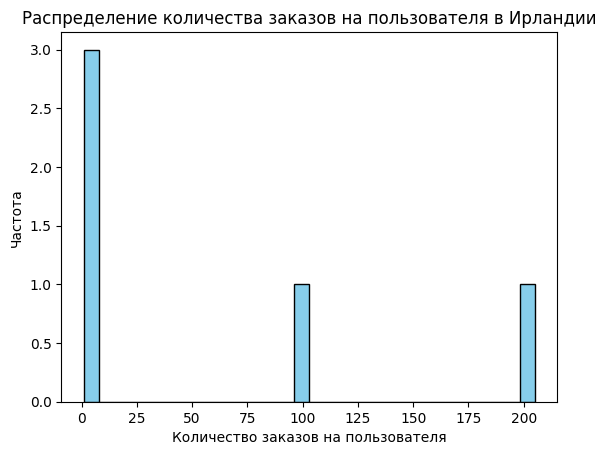

count      5.000000
mean      63.200000
std       90.150984
min        1.000000
25%        1.000000
50%        7.000000
75%      102.000000
max      205.000000
Name: Invoice, dtype: float64


In [28]:

# Построим гистограмму распределения количества заказов на одного пользователя в Ирландии
orders_per_user_eire = df[df['Country'] == 'EIRE'].groupby('Customer ID')['Invoice'].nunique()
plt.hist(orders_per_user_eire, bins=30, color='skyblue', edgecolor='black')
plt.title('Распределение количества заказов на пользователя в Ирландии')
plt.xlabel('Количество заказов на пользователя')
plt.ylabel('Частота')
plt.show()

# Выводим статистику по этим данным для более точного анализа
print(orders_per_user_eire.describe())

Среднее количество заказов на одного пользователя варьируется в зависимости от страны. Например, в странах с более высокоразвитыми рынками, такими как Нидерланды, Литва, Германия среднее количество заказов на пользователя составляет 5-6, что указывает на более высокую активность клиентов. Великобритания находится в верхней часте списака, что подтверждает предыдущую гепотезу. На низких уровнях находятся такие страны, как Южная Корея, Израиль и Бразилия, где пользователи совершают лишь по одному заказу.

Ирландия значительно выбивается из общего ряда, где среднее количество заказов на пользователя составляет 63. Однако это число обусловлено аномальными данными: всего 5 пользователей из Ирландии сделали заказы на этом сайте. Примечательно, что один или несколько пользователей сделали гораздо больше заказов, что сильно повлияло на среднее значение. Стандартное отклонение (90) и разброс значений от 1 до 205 заказов подтверждают наличие выбросов, что объясняет столь высокое среднее значение по сравнению с другими странами.


Посмотрим на процент больших покупок в каждой стране с помощью визуализации. 

In [29]:
# Шаг 1: Удаляем дубликаты по Invoice, оставляя одно значение total_purchase_for_user для каждого заказа
unique_purchases = df.drop_duplicates(subset=['Invoice'])

# Шаг 2: Фильтруем уникальные заказы, где total_purchase_for_user > 1000
high_value_purchases = unique_purchases[unique_purchases['total_purchase_for_user'] > 1000]

# Шаг 3: Считаем количество высоких покупок для каждой страны
high_value_purchase_count = high_value_purchases.groupby('Country').size()

# Шаг 4: Считаем общее количество уникальных покупок по странам
total_unique_purchase_count = unique_purchases.groupby('Country').size()

# Шаг 5: Рассчитываем процент высоких покупок для каждой страны
high_value_purchase_percentage = ((high_value_purchase_count / total_unique_purchase_count) * 100).sort_values(ascending=False)

# Выводим результаты
print(high_value_purchase_percentage)



Country
Israel                  100.000000
Thailand                100.000000
Norway                   54.545455
Lithuania                50.000000
United Arab Emirates     50.000000
Singapore                50.000000
Malta                    50.000000
Denmark                  38.461538
Unspecified              37.500000
Netherlands              35.555556
Greece                   30.769231
Sweden                   29.411765
Channel Islands          26.666667
EIRE                     24.050633
Switzerland              20.000000
Portugal                 20.000000
Japan                    18.750000
Austria                  17.857143
Spain                    16.666667
Cyprus                   14.285714
Italy                    14.285714
Germany                  14.121037
Belgium                  13.461538
France                   12.711864
Australia                 7.500000
USA                       6.666667
United Kingdom            6.245032
Bahrain                        NaN
Brazil      

C:\Users\User\AppData\Local\Temp\ipykernel_12936\2438689225.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=high_value_purchase_percentage.values, y=high_value_purchase_percentage.index, palette='viridis')


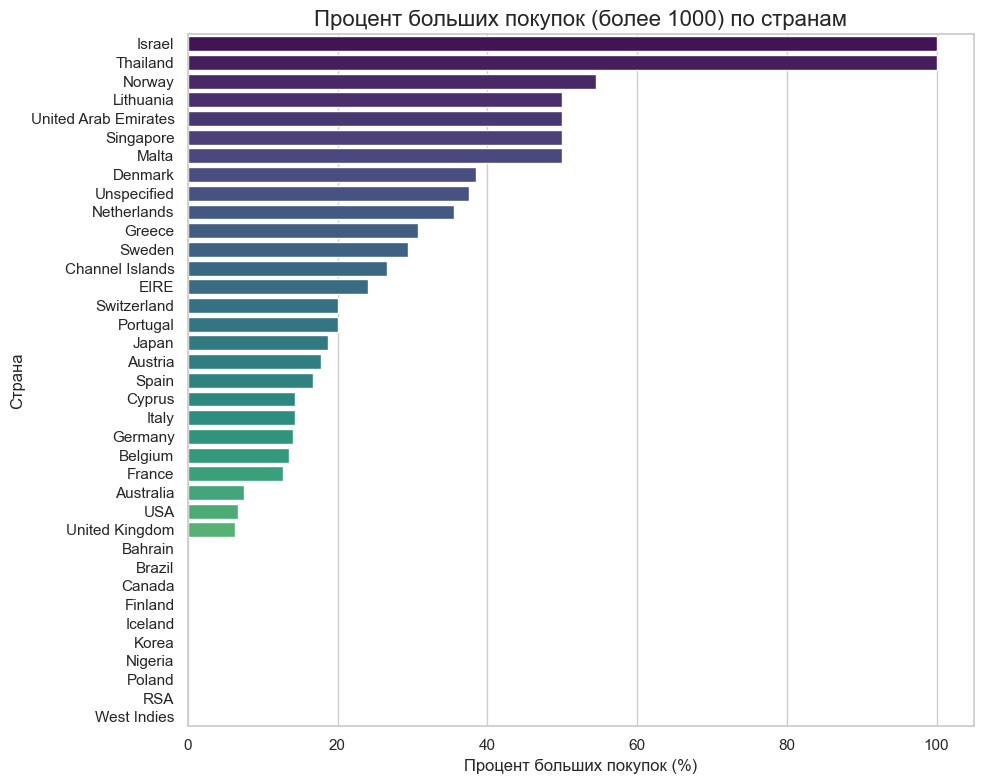

In [30]:
# Настройка стиля графика
sns.set(style="whitegrid")

# Визуализация данных с использованием seaborn
plt.figure(figsize=(10, 8))
sns.barplot(x=high_value_purchase_percentage.values, y=high_value_purchase_percentage.index, palette='viridis')

# Добавление заголовка и подписей осей
plt.title('Процент больших покупок (более 1000) по странам', fontsize=16)
plt.xlabel('Процент больших покупок (%)', fontsize=12)
plt.ylabel('Страна', fontsize=12)

# Показываем график
plt.tight_layout()
plt.show()

Процент серьезных покупок (сумма более 1000) на пользователя значительно варьируется по странам, с наибольшими показателями в Израиле и Таиланде, что может указывать на присутствие группы покупателей с высокой покупательной способностью. Напротив, в Великобритании, США и Австралии процент больших покупок значительно ниже, что отражает более массовое потребление, где большинство заказов невысокого ценового сегмента. В некоторых странах, таких как Бахрейн и Бразилия, отсутствуют данные по таким покупкам, что связано с недостаточным количеством пользователей. Эти данные подтверждают взаимосвязь с предыдущими метриками, где страны с высокими процентами дорогих покупок часто показывают низкое количество заказов на пользователя, в то время как в странах с большим числом заказов на пользователя покупки обычно более мелкие.

In [31]:
# Список стран, для которых нужно посчитать уникальных пользователей
countries_with_no_data = ['Bahrain', 'Brazil', 'Canada', 'Finland', 'Iceland', 'Korea', 'Nigeria', 'Poland', 'RSA', 'West Indies']

# Фильтруем данные по этим странам
df_filtered = df[df['Country'].isin(countries_with_no_data)]

# Считаем количество уникальных пользователей (Customer ID) в каждой стране
unique_users_by_country = df_filtered.groupby('Country')['Customer ID'].nunique()

# Выводим результат
print(unique_users_by_country)


Country
Bahrain        2
Brazil         1
Canada         1
Finland        7
Iceland        1
Korea          2
Nigeria        1
Poland         2
RSA            1
West Indies    1
Name: Customer ID, dtype: int64


Как мы можем видеть, в каждой из стран со с нулевым значением количества покупок, очень мало заказчиков (менее 10), что подтверждает предыдущую теорию. 

Посмотрим на количество заказов по месяцам. Для этого нужно взять месяц из столбца даты с помощью dt.month.

C:\Users\User\AppData\Local\Temp\ipykernel_12936\1379754800.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month'] = df['InvoiceDate'].dt.month


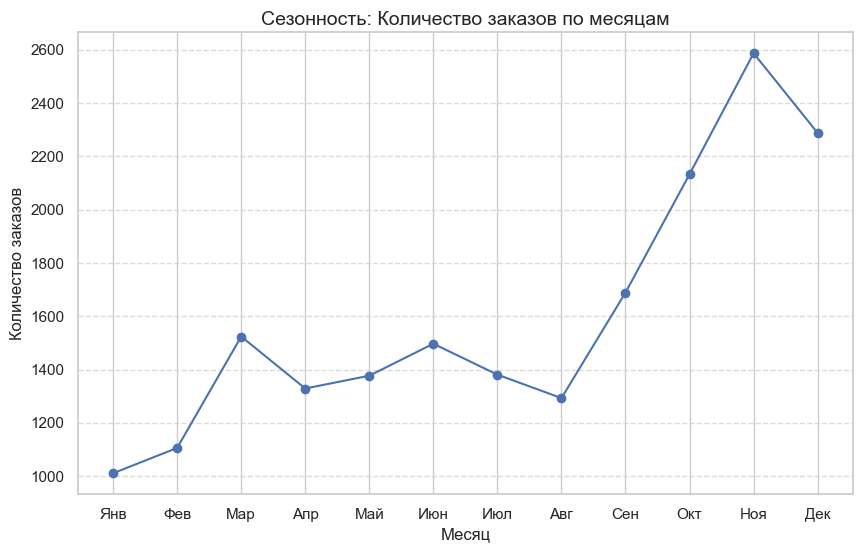

In [32]:
# Добавление нового столбца с номером месяца
df['Month'] = df['InvoiceDate'].dt.month

# Группировка данных по месяцу и подсчет уникальных заказов (Invoice)
monthly_orders = df.groupby('Month')['Invoice'].nunique()

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(monthly_orders.index, monthly_orders.values, marker='o', linestyle='-', color='b')
plt.title('Сезонность: Количество заказов по месяцам', fontsize=14)
plt.xlabel('Месяц', fontsize=12)
plt.ylabel('Количество заказов', fontsize=12)
plt.xticks(range(1, 13), ['Янв', 'Фев', 'Мар', 'Апр', 'Май', 'Июн', 'Июл', 'Авг', 'Сен', 'Окт', 'Ноя', 'Дек'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

График сезонности показывает, что самое большое количество заказов приходится на ноябрь, с небольшим снижением в декабре. Это скорее всего связано с сезонными распродажами, такими как Черная пятница и Рождественские праздники, когда покупательская активность резко возрастает. В период с марта по июль наблюдается относительно стабильное количество заказов, что можно связать с повседневной активностью потребителей без ярко выраженных сезонных пиков. Летом, особенно в августе, количество заказов снижается, что, вероятно, связано с отпускным сезоном и снижением активности покупателей. Осенью, начиная с сентября, виден значительный рост заказов, что может быть связано с подготовкой к осенним и зимним праздникам. Эти данные подчеркивают необходимость сосредоточить маркетинговые усилия на подготовке к пиковому сезону (октябрь–декабрь) и стимулировать спрос в периоды спада, например, в августе, с помощью специальных акций и предложений.

Посмотрим на активность пользователей по часам.

C:\Users\User\AppData\Local\Temp\ipykernel_12936\3892799018.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Hour'] = df['InvoiceDate'].dt.hour


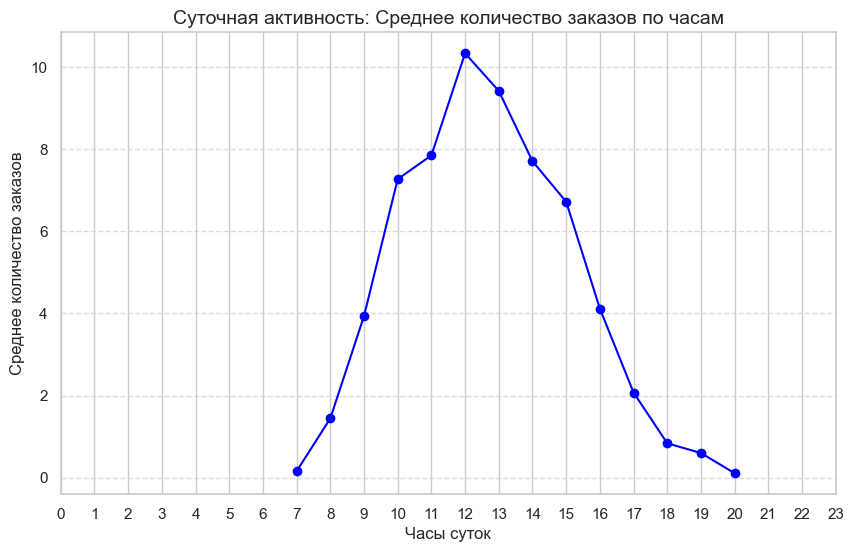

In [33]:
# Добавляем столбец с часами
df['Hour'] = df['InvoiceDate'].dt.hour

# Группируем данные по дате и часу, подсчитываем количество уникальных заказов (Invoice) в каждый час
hourly_orders = df.groupby(['Hour'])['Invoice'].nunique()

# Считаем количество уникальных дней в наборе данных
unique_days = df['InvoiceDate'].dt.date.nunique()

# Вычисляем среднее количество заказов для каждого часа
average_hourly_orders = hourly_orders / unique_days

plt.figure(figsize=(10, 6))
plt.plot(average_hourly_orders.index, average_hourly_orders.values, marker='o', linestyle='-', color='blue')
plt.title('Суточная активность: Среднее количество заказов по часам', fontsize=14)
plt.xlabel('Часы суток', fontsize=12)
plt.ylabel('Среднее количество заказов', fontsize=12)
plt.xticks(range(0, 24))  # Обозначаем часы суток
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

График суточной активности показывает, что основное количество заказов приходится на утренние и дневные часы. Активность начинает расти с 7 утра, достигает заметного пика в промежутке между 11 и 12 часами дня, после чего постепенно снижается. Это может быть связано с тем, что большинство пользователей активны в рабочие часы, особенно в середине дня. После обеда, начиная с 15 часов, наблюдается постепенное снижение количества заказов, достигая минимальных значений к вечеру (после 18–19 часов). Такая динамика может указывать на то, что основной покупательский трафик приходится на дневное время, что стоит учитывать при планировании рекламных кампаний и оптимизации работы платформы в наиболее активные часы.